In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder


In [4]:
data = pd.read_excel("https://raw.githubusercontent.com/ygtech27/Datasets/refs/heads/main/Online%20retail.xlsx", header=None)
data.head()

,0
0,"shrimp,almonds,avocado,vegetables mix,green gr..."
1,"burgers,meatballs,eggs"
2,chutney
3,"turkey,avocado"
4,"mineral water,milk,energy bar,whole wheat rice..."


In [5]:
# The data is in a single column with comma-separated values.
# We need to split the column into individual items and then process it for association rule mining.

# Convert the dataframe to a list of lists, where each inner list represents a transaction
transactions = data[0].apply(lambda x: x.split(',')).tolist()

# Use TransactionEncoder to convert the list of transactions into a one-hot encoded DataFrame
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
basket = pd.DataFrame(te_ary, columns=te.columns_)

# Display the first few rows of the processed data
display(basket.head())

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [6]:
def run_apriori(basket, min_support=0.02, min_confidence=0.3):
    frequent_itemsets = apriori(basket, min_support=min_support, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)
    rules = rules.sort_values(by='lift', ascending=False)
    return frequent_itemsets, rules


In [7]:
supports = [0.01, 0.015, 0.02]
confidences = [0.2, 0.3, 0.4]

all_results = []
for s in supports:
    for c in confidences:
        fi, rules = run_apriori(basket, s, c)
        print(f"Support: {s}, Confidence: {c}, Rules Found: {len(rules)}")
        all_results.append((s, c, rules))


Support: 0.01, Confidence: 0.2, Rules Found: 162
Support: 0.01, Confidence: 0.3, Rules Found: 63
Support: 0.01, Confidence: 0.4, Rules Found: 18
Support: 0.015, Confidence: 0.2, Rules Found: 95
Support: 0.015, Confidence: 0.3, Rules Found: 37
Support: 0.015, Confidence: 0.4, Rules Found: 8
Support: 0.02, Confidence: 0.2, Rules Found: 55
Support: 0.02, Confidence: 0.3, Rules Found: 20
Support: 0.02, Confidence: 0.4, Rules Found: 3


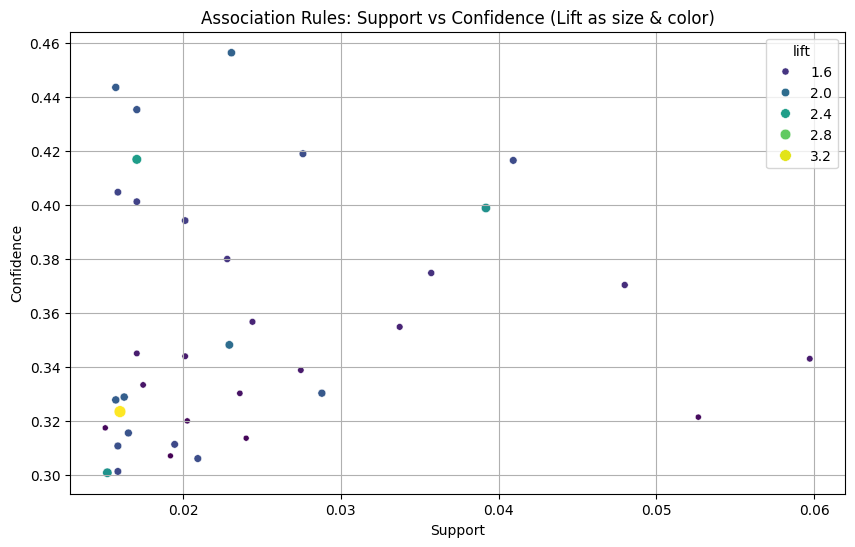

In [8]:
_, _, selected_rules = all_results[4]

plt.figure(figsize=(10,6))
sns.scatterplot(x='support', y='confidence', size='lift', data=selected_rules, hue='lift', palette='viridis')
plt.title('Association Rules: Support vs Confidence (Lift as size & color)')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.grid(True)
plt.show()


In [9]:
selected_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10)


,antecedents,consequents,support,confidence,lift
11,(herb & pepper),(ground beef),0.015998,0.323450,3.291994
33,"(ground beef, mineral water)",(spaghetti),0.017064,0.416938,2.394681
19,(soup),(milk),0.015198,0.300792,2.321232
13,(ground beef),(spaghetti),0.039195,0.398915,2.291162
29,(olive oil),(spaghetti),0.022930,0.348178,1.999758
24,(soup),(mineral water),0.023064,0.456464,1.914955
15,(herb & pepper),(spaghetti),0.016264,0.328841,1.888695
35,"(mineral water, milk)",(spaghetti),0.015731,0.327778,1.882589
36,"(milk, spaghetti)",(mineral water),0.015731,0.443609,1.861024
0,(burgers),(eggs),0.028796,0.330275,1.837830


**1. What is Lift and why is it important?**
Lift = Confidence / (Support of consequent).
Lift > 1 indicates a strong positive association. It's important because it reveals the strength of the relationship beyond chance.

**2. What is Support and Confidence?**
- Support(A) = Frequency of A / Total Transactions
- Confidence(A→B) = Support(A ∩ B) / Support(A)

**3. Limitations of Association Rule Mining**
- Generates many trivial rules
- Parameter tuning is tricky
- Doesn't account for sequence or time
- High memory for large datasets
